In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from p1_data_cleaning import op_clean
from p0_common import run_label_exact_value

In [7]:
# count txn frequency per punk
df = op_clean.groupby('punk_id')['tx_hash'].count().reset_index()
df.rename({'tx_hash': 'txn_num'}, axis=1, inplace=True)
df = df[df['txn_num'] != 1].reset_index(drop=True)
print("\ntxn frequency in each punk\n", df)

txn_list = sorted(df['txn_num'].unique().tolist())
print("\ntxn frequency list\n", txn_list)

df2 = df.groupby('txn_num').count().reset_index()                      
df2['pct']= df2['punk_id']/df2['punk_id'].sum()            #cal percentage
df2.rename({'punk_id': 'count'}, axis=1, inplace=True)
print("\ntxn frequency table")
df2


txn frequency in each punk
       punk_id  txn_num
0         0.0        3
1         1.0        3
2        14.0        3
3        53.0        3
4        89.0        3
...       ...      ...
4431   9976.0        3
4432   9979.0        2
4433   9980.0        6
4434   9982.0        2
4435   9990.0        2

[4436 rows x 2 columns]

txn frequency list
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16]

txn frequency table


,txn_num,count,pct
0,2,1521,0.342876
1,3,1062,0.239405
2,4,732,0.165014
3,5,458,0.103246
4,6,274,0.061767
5,7,168,0.037872
6,8,120,0.027051
7,9,51,0.011497
8,10,21,0.004734
9,11,11,0.002480


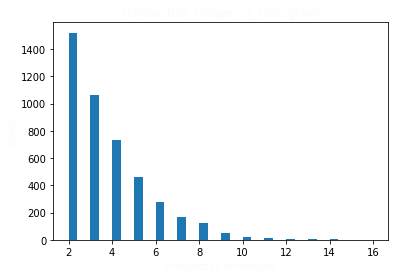

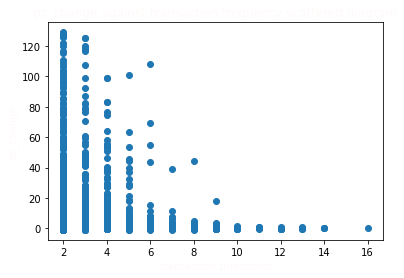

In [8]:
# histogram
x = df.copy()['txn_num']
plt.xlabel('transaction thresholds', color='snow')
plt.ylabel('count', color='snow')
plt.title('transaction frequency histogram', color='snow')
plt.hist(x, bins=txn_list, width=0.4)
plt.show()

# scattered diagram
p1 = pd.read_csv('__filtered_result__\\normalies_df_last_two_eth_pc_change.csv') #picked this file as an example
p2 = pd.merge(p1, df.copy(), on='punk_id')

threshold = np.percentile(p2.loc[:,'eth_pc_change'], 97) #remove some outliners
p2 = p2[p2['eth_pc_change'] <= threshold]

plt.xlabel('transaction thresholds', color='snow')
plt.ylabel('pc_change', color='snow')
plt.title('pc_change against transaction frequency scattered diagram', color='snow')
plt.scatter(p2['txn_num'], p2['eth_pc_change'])

In [9]:
#label with different frequency cutoffs
bins = [2, 5, 9, 13, 16]                                              #Note: can adjust here if want to use different labelling
label = ["0", "1", "2", "3"]                                          #Note: can adjust here if want to use different labelling
result = run_label_exact_value(df, bins, label, 1).reset_index(drop=True)
result

final_labels_combinded = result[['punk_id', 'label']]
final_labels_combinded.to_csv('mp_final_labels_combined.csv', index=False)
final_labels_combinded


transaction_cutoffs: [2, 5, 9, 13, 16]
Number of items in label 0: 3315
Number of items in label 1: 1020
Number of items in label 2: 91
Number of items in label 3: 10


,punk_id,label
0,0.0,0
1,1.0,0
2,14.0,0
3,53.0,0
4,89.0,0
...,...,...
4431,9976.0,0
4432,9979.0,0
4433,9980.0,1
4434,9982.0,0


In [10]:
#features
df_n = pd.read_csv('ip_df_without_noise.csv')

con = df['punk_id'].tolist()
df_n = df_n[df_n['id'].isin(con) == True].reset_index(drop=True)

df_n.to_csv('mp_final_features.csv', index=False)
df_n

,id,num_attributes,Alien,Ape,Female,Male,Zombie,3D Glasses,Bandana,Beanie,...,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,0,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,89,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4431,9976,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4432,9979,4,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4433,9980,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4434,9982,3,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
